In [14]:
import numpy as np
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt
import cv2

input = cv2.imread('./img/shapes.jpg')
cv2.imshow("screen", input)
cv2.waitKey()
cv2.destroyAllWindows()

# Contours

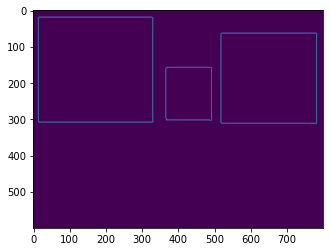

In [16]:
# Contours - lines or curves that covers full boundary of an object
#     Object Detection
#     Shape Analysis
input_gray = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
input_gray_canny = cv2.Canny(input_gray, 30, 200)
contours, hierarchy = cv2.findContours(input_gray_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Types of hierarchies are different depending upon whether you need external, internal, all contour points.
# here we use to retrieve External contours, thus used cv2.RETR_EXTERNAL
# cv2.RETR_LIST can also be used if there is any inside points of contours that need to be identified

# Chain Approx None stores the points of contours in a more optimized way: if the contour points are on the same line, it
# only saves starting and ending points, say for a line.
cv2.imshow("contours", input_gray_canny)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(input_gray_canny)

3


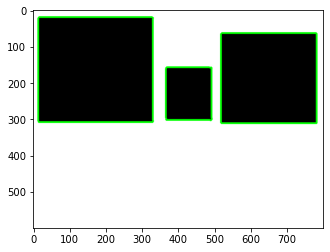

In [24]:
print(len(contours))
cv2.drawContours(input, contours, -1, (0, 255, 0), 3)
cv2.imshow("contours", input)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(input)

## Sorting Contours

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


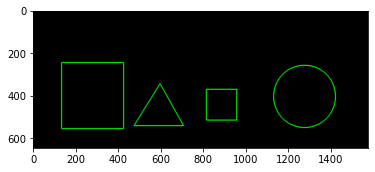

In [31]:
# Sorting contours can be helpful in terms of size. Smallest contours can be noise to remove, 
# largest contours can be main object to extract and detect
input = cv2.imread("img/bunchofshapes.jpg")
blank = np.zeros((input.shape[0], input.shape[1], 3))
input_gray = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
input_gray_canny = cv2.Canny(input_gray, 50, 200)

contours, hierarchy = cv2.findContours(input_gray_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow("contours", input_gray_canny)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(input_gray_canny)

cv2.drawContours(blank, contours, -1, (0, 255, 0),3)
cv2.imshow("contoursblank", blank)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(blank)

cv2.drawContours(input, contours, -1, (0, 255, 0),3)
cv2.imshow("contoursblankin", blank)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(blank)

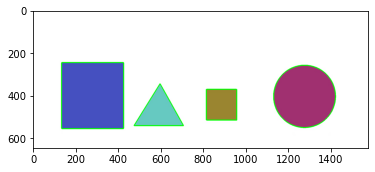

In [34]:
cv2.imshow("contoursblank", input)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(input)

# Contour Approximation and Convex Hull

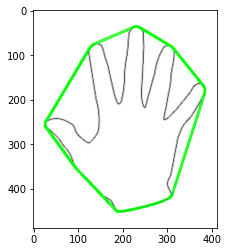

In [44]:
hand = cv2.imread('img/hand.jpg')
hand_gray = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(hand_gray, 176, 255, 0)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.imshow("contoursblank", thresh)

n = len(contours) - 1
contours = sorted(contours, key = cv2.contourArea, reverse=False)[:n]

for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(hand, [hull], 0, (0, 255, 0), 2)
    cv2.imshow("convex", hand)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(hand)